# Cleaning and Analyzing the Bios

### Importing Libraries

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

### Loading the Data

In [3]:
with open("profiles.pkl",'rb') as fp:
    df = pickle.load(fp)

## Cleaning the Text

In [4]:
# Instantiating the lemmatizer
lemmatizer = WordNetLemmatizer()

In [5]:
def tokenize(text):
    """
    Tokenizing the bios, then lemmatizing them
    """
    # Creating a library of stopwords
    stops = stopwords.words('english')
    
    # Lowercasing the words
    text = text.lower()
    
    # Removing the punctuations (periods)
    text = text.replace('.', '')
    
    # Splitting on spaces between words
    text = text.split(' ')
    
    # Lemmatizing the words and removing stop words
    text = [lemmatizer.lemmatize(i) for i in text if i not in stops]
    
    return text
    

In [6]:
df['Bios'] = df.Bios.apply(tokenize)

### Most Frequent Words

In [7]:
total_vocab = set()

for bio in df['Bios']:
    total_vocab.update(bio)
        
print("Number of unique words: ",len(total_vocab))

Number of unique words:  104


In [8]:
# Determining the most frequent words in user bios
words = []

for bio in df['Bios']:
    words.extend(bio)

bio_freq = FreqDist(words)
bio_freq.most_common(104)

[('fanatic', 2241),
 ('travel', 1737),
 ('music', 1681),
 ('food', 1657),
 ('social', 1654),
 ('zombie', 1652),
 ('pop', 1645),
 ('tv', 1636),
 ('twitter', 1622),
 ('coffee', 1617),
 ('web', 1612),
 ('beer', 1605),
 ('bacon', 1585),
 ('medium', 1577),
 ('alcohol', 1574),
 ('culture', 1572),
 ('internet', 1534),
 ('expert', 1183),
 ('geek', 1165),
 ('buff', 1164),
 ('lover', 1159),
 ('guru', 1158),
 ('fan', 1157),
 ('ninja', 1143),
 ('scholar', 1142),
 ('trailblazer', 1138),
 ('maven', 1137),
 ('junkie', 1134),
 ('specialist', 1119),
 ('advocate', 1116),
 ('enthusiast', 1108),
 ('practitioner', 1105),
 ('nerd', 1101),
 ('aficionado', 1099),
 ('evangelist', 1092),
 ('introvert', 861),
 ('gamer', 853),
 ('reader', 850),
 ('communicator', 829),
 ('writer', 815),
 ('creator', 815),
 ('student', 808),
 ('explorer', 806),
 ('thinker', 805),
 ('analyst', 804),
 ('certified', 793),
 ('troublemaker', 787),
 ('general', 786),
 ('organizer', 781),
 ('problem', 770),
 ('solver', 770),
 ('devoted', 

### Plotting the Most Frequent Words

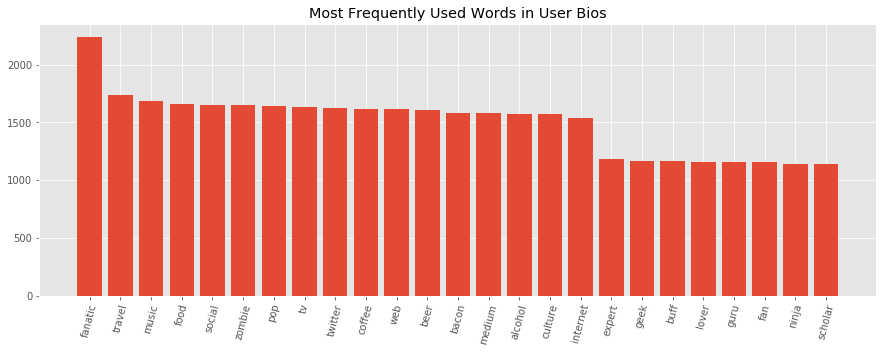

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(15,5))

plt.bar(*zip(*bio_freq.most_common(25)))
plt.xticks(rotation=75)
plt.title('Most Frequently Used Words in User Bios')
plt.show()

It would possibly be best to create some bigrams with this data as most of the words appear to be adjectives.

## Bigrams

In [10]:
# Instantiating the score of each bigram
bigram_meas = BigramAssocMeasures()

# Finding and ranking the Bigrams in each bio
bio_finder = BigramCollocationFinder.from_words(words)

# Finding the frequency scores of each bigram 
bio_scored = bio_finder.score_ngrams(bigram_meas.raw_freq)

In [34]:
# Top 50 most common bigrams
bio_scored[:50]

[(('social', 'medium'), 0.019017184202592706),
 (('pop', 'culture'), 0.018956888754899006),
 (('problem', 'solver'), 0.009285498944829666),
 (('subtly', 'charming'), 0.008525776303889057),
 (('infuriatingly', 'humble'), 0.00763340367802231),
 (('future', 'teen'), 0.002568586071751583),
 (('teen', 'idol'), 0.002568586071751583),
 (('fit', 'apathy'), 0.0025082906240578838),
 (('prone', 'fit'), 0.0025082906240578838),
 (('fall', 'lot'), 0.002496231534519144),
 (('animal', 'everywhere'), 0.002411817907747965),
 (('friend', 'animal'), 0.002411817907747965),
 (('music', 'fanatic'), 0.0022309315646668678),
 (('zombie', 'fanatic'), 0.002206813385589388),
 (('travel', 'fanatic'), 0.002194754296050648),
 (('medium', 'fanatic'), 0.0021103406692794696),
 (('boxing', 'glove'), 0.0020982815797407294),
 (('type', 'boxing'), 0.0020982815797407294),
 (('unable', 'type'), 0.0020982815797407294),
 (('food', 'fanatic'), 0.001989749773892071),
 (('internet', 'fanatic'), 0.001977690684353331),
 (('culture',

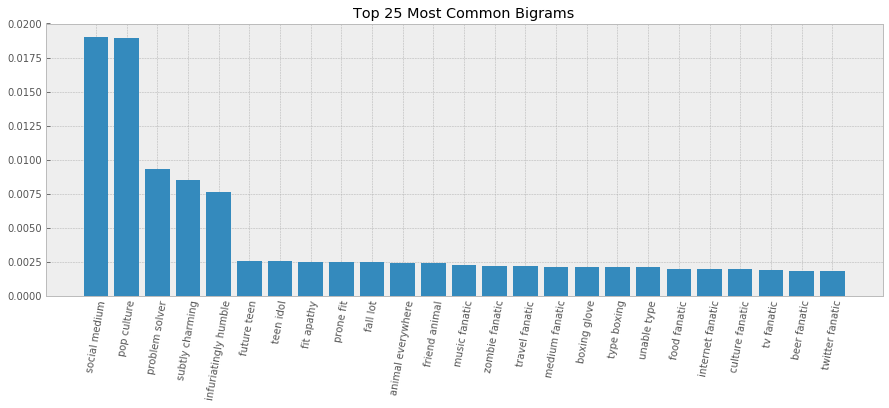

In [55]:
# Creating a list of the bigrams
bg = list(map(lambda x: x[0][0] + ' ' + x[0][1], bio_scored[:50]))

# Creating a list of the frequency scores
bio_scores = list(map(lambda x: x[1], bio_scored[:50]))

# Combining both the scores and the bigrams
bigrams = list(zip(bg, bio_scores))

# Plotting the bigrams and their frequency scores
plt.style.use('bmh')
plt.figure(figsize=(15,5))

plt.bar(*zip(*bigrams[:25]))
plt.xticks(rotation=80)
plt.title('Top 25 Most Common Bigrams')
plt.show()

In [12]:
# Filtering out bigrams based on frequency of occurence
bio_finder.apply_freq_filter(20)

# Calculating the pointwise mutual information score, which determines how often these words are associated with each other
bio_pmi = bio_finder.score_ngrams(bigram_meas.pmi)

In [13]:
bio_pmi

[(('boxing', 'glove'), 8.89657599071402),
 (('type', 'boxing'), 8.89657599071402),
 (('unable', 'type'), 8.89657599071402),
 (('animal', 'everywhere'), 8.695663296788021),
 (('friend', 'animal'), 8.695663296788021),
 (('fall', 'lot'), 8.646032529063424),
 (('fit', 'apathy'), 8.639079768421656),
 (('prone', 'fit'), 8.639079768421656),
 (('future', 'teen'), 8.604809866336904),
 (('teen', 'idol'), 8.604809866336904),
 (('infuriatingly', 'humble'), 7.033457797134407),
 (('subtly', 'charming'), 6.873953081753346),
 (('problem', 'solver'), 6.750804850980483),
 (('pop', 'culture'), 5.655647617940144),
 (('pop', 'cultureaholic'), 5.655647617940144),
 (('social', 'mediaholic'), 5.647775967391471),
 (('social', 'medium'), 5.647775967391471),
 (('tv', 'scholar'), 2.2476825046593056),
 (('unapologetic', 'organizer'), 2.200519801892071),
 (('alcohol', 'maven'), 2.1976397422426217),
 (('bacon', 'aficionado'), 2.192239191307902),
 (('tv', 'maven'), 2.1849712567002477),
 (('food', 'lover'), 2.16693646

### Creating Bigrams in the DF

In [14]:
# Creating bigrams for each pair of words in the bios
df['Bigrams'] = df.Bios.apply(lambda bio: BigramCollocationFinder.from_words(bio).nbest(bigram_meas.pmi, 100))

In [15]:
df[['Bios', 'Bigrams']]

,Bios,Bigrams
0,"[typical, twitter, fanatic, infuriatingly, humble, thinker, lifelong, coffee, practitioner, organizer]","[(coffee, practitioner), (fanatic, infuriatingly), (humble, thinker), (infuriatingly, humble), (lifelong, coffee), (practitioner, organizer), (thinker, lifelong), (twitter, fanatic), (typical, twitter)]"
1,"[web, junkie, analyst, infuriatingly, humble, introvert, food, nerd, lifelong, music, fanatic, coffee, lover]","[(analyst, infuriatingly), (coffee, lover), (fanatic, coffee), (food, nerd), (humble, introvert), (infuriatingly, humble), (introvert, food), (junkie, analyst), (lifelong, music), (music, fanatic), (nerd, lifelong), (web, junkie)]"
2,"[avid, web, maven, food, practitioner, gamer, twitter, fanatic, pop, culture, scholar, zombie, evangelist]","[(avid, web), (culture, scholar), (fanatic, pop), (food, practitioner), (gamer, twitter), (maven, food), (pop, culture), (practitioner, gamer), (scholar, zombie), (twitter, fanatic), (web, maven), (zombie, evangelist)]"
3,"[twitteraholic, extreme, web, fanatic, food, buff, infuriatingly, humble, entrepreneur]","[(buff, infuriatingly), (extreme, web), (fanatic, food), (food, buff), (humble, entrepreneur), (infuriatingly, humble), (twitteraholic, extreme), (web, fanatic)]"
4,"[bacon, enthusiast, fall, lot, freelance, social, medium, fan, infuriatingly, humble, introvert]","[(bacon, enthusiast), (enthusiast, fall), (fall, lot), (fan, infuriatingly), (freelance, social), (humble, introvert), (infuriatingly, humble), (lot, freelance), (medium, fan), (social, medium)]"
5,"[pop, culture, junkie, tv, buff, reader, friendly, travel, expert, incurable, twitteraholic, social, medium, ninja, coffee, enthusiast, internet, specialist]","[(buff, reader), (coffee, enthusiast), (culture, junkie), (enthusiast, internet), (expert, incurable), (friendly, travel), (incurable, twitteraholic), (internet, specialist), (junkie, tv), (medium, ninja), (ninja, coffee), (pop, culture), (reader, friendly), (social, medium), (travel, expert), (tv, buff), (twitteraholic, social)]"
6,"[typical, thinker, amateur, explorer, reader, extreme, student, tv, fanatic, social, medium, ninja]","[(amateur, explorer), (explorer, reader), (extreme, student), (fanatic, social), (medium, ninja), (reader, extreme), (social, medium), (student, tv), (thinker, amateur), (tv, fanatic), (typical, thinker)]"
7,"[zombie, maven, travel, geek, professional, social, medium, buff, avid, pop, culture, lover]","[(avid, pop), (buff, avid), (culture, lover), (geek, professional), (maven, travel), (medium, buff), (pop, culture), (professional, social), (social, medium), (travel, geek), (zombie, maven)]"
8,"[lifelong, introvert, general, travel, maven, hipster-friendly, web, trailblazer, writer, alcohol, fan, student, communicator, coffee, guru]","[(alcohol, fan), (coffee, guru), (communicator, coffee), (fan, student), (general, travel), (hipster-friendly, web), (introvert, general), (lifelong, introvert), (maven, hipster-friendly), (student, communicator), (trailblazer, writer), (travel, maven), (web, trailblazer), (writer, alcohol)]"
9,"[travel, ninja, amateur, pop, culture, evangelist, web, fanatic, freelance, communicator, zombie, geek]","[(amateur, pop), (communicator, zombie), (culture, evangelist), (evangelist, web), (fanatic, freelance), (freelance, communicator), (ninja, amateur), (pop, culture), (travel, ninja), (web, fanatic), (zombie, geek)]"


## Exporting the Data

In [144]:
# Pickling the tokenized words and bigrams
with open("clean_bigram_df.pkl", "wb") as fp:
    pickle.dump(df, fp)